In [1]:
# Example from [http://nayefreza.wordpress.com/2013/05/11/zhang-suen-thinning-algorithm-java-implementation/ this blog post].
beforeTxt = '''\
1100111
1100111
1100111
1100111
1100110
1100110
1100110
1100110
1100110
1100110
1100110
1100110
1111110
0000000\
'''
 
# Thanks to [http://www.network-science.de/ascii/ this site] and vim for these next two examples
smallrc01 = '''\
00000000000000000000000000000000
01111111110000000111111110000000
01110001111000001111001111000000
01110000111000001110000111000000
01110001111000001110000000000000
01111111110000001110000000000000
01110111100000001110000111000000
01110011110011101111001111011100
01110001111011100111111110011100
00000000000000000000000000000000\
'''
 
rc01 = '''\
00000000000000000000000000000000000000000000000000000000000
01111111111111111100000000000000000001111111111111000000000
01111111111111111110000000000000001111111111111111000000000
01111111111111111111000000000000111111111111111111000000000
01111111100000111111100000000001111111111111111111000000000
00011111100000111111100000000011111110000000111111000000000
00011111100000111111100000000111111100000000000000000000000
00011111111111111111000000000111111100000000000000000000000
00011111111111111110000000000111111100000000000000000000000
00011111111111111111000000000111111100000000000000000000000
00011111100000111111100000000111111100000000000000000000000
00011111100000111111100000000111111100000000000000000000000
00011111100000111111100000000011111110000000111111000000000
01111111100000111111100000000001111111111111111111000000000
01111111100000111111101111110000111111111111111111011111100
01111111100000111111101111110000001111111111111111011111100
01111111100000111111101111110000000001111111111111011111100
00000000000000000000000000000000000000000000000000000000000\
'''
 
def intarray(binstring):
    '''Change a 2D matrix of 01 chars into a list of lists of ints'''
    return [[1 if ch == '1' else 0 for ch in line] 
            for line in binstring.strip().split()]
 
def chararray(intmatrix):
    '''Change a 2d list of lists of 1/0 ints into lines of 1/0 chars'''
    return '\n'.join(''.join(str(p) for p in row) for row in intmatrix)
 
def toTxt(intmatrix):
    '''Change a 2d list of lists of 1/0 ints into lines of '#' and '.' chars'''
    return '\n'.join(''.join(('#' if p else '.') for p in row) for row in intmatrix)
 
def neighbours(x, y, image):
    '''Return 8-neighbours of point p1 of picture, in order'''
    i = image
    x1, y1, x_1, y_1 = x+1, y-1, x-1, y+1
    #print ((x,y))
    return [i[y1][x],  i[y1][x1],   i[y][x1],  i[y_1][x1],  # P2,P3,P4,P5
            i[y_1][x], i[y_1][x_1], i[y][x_1], i[y1][x_1]]  # P6,P7,P8,P9
 
def transitions(neighbours):
    n = neighbours + neighbours[0:1]    # P2, ... P9, P2
    return sum((n1, n2) == (0, 1) for n1, n2 in zip(n, n[1:]))
 
def zhangSuen(image):
    changing1 = changing2 = [(-1, -1)]
    while changing1 or changing2:
        # Step 1
        changing1 = []
        for y in range(1, len(image) - 1):
            for x in range(1, len(image[0]) - 1):
                P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, image)
                if (image[y][x] == 1 and    # (Condition 0)
                    P4 * P6 * P8 == 0 and   # Condition 4
                    P2 * P4 * P6 == 0 and   # Condition 3
                    transitions(n) == 1 and # Condition 2
                    2 <= sum(n) <= 6):      # Condition 1
                    changing1.append((x,y))
        for x, y in changing1: image[y][x] = 0
        # Step 2
        changing2 = []
        for y in range(1, len(image) - 1):
            for x in range(1, len(image[0]) - 1):
                P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, image)
                if (image[y][x] == 1 and    # (Condition 0)
                    P2 * P6 * P8 == 0 and   # Condition 4
                    P2 * P4 * P8 == 0 and   # Condition 3
                    transitions(n) == 1 and # Condition 2
                    2 <= sum(n) <= 6):      # Condition 1
                    changing2.append((x,y))
        for x, y in changing2: image[y][x] = 0
        #print changing1
        #print changing2
    return image
 
if __name__ == '__main__':
    for picture in (beforeTxt, smallrc01, rc01):
        image = intarray(picture)
        print('\nFrom:\n%s' % toTxt(image))
        after = zhangSuen(image)
        print('\nTo thinned:\n%s' % toTxt(after))


From:
##..###
##..###
##..###
##..###
##..##.
##..##.
##..##.
##..##.
##..##.
##..##.
##..##.
##..##.
######.
.......

To thinned:
##..###
#.....#
#.....#
#...###
#...#..
#...#..
#...#..
#...#..
#...#..
#...#..
#...#..
#...#..
#####..
.......

From:
................................
.#########.......########.......
.###...####.....####..####......
.###....###.....###....###......
.###...####.....###.............
.#########......###.............
.###.####.......###....###......
.###..####..###.####..####.###..
.###...####.###..########..###..
................................

To thinned:
................................
..#######.........######........
..#.....#........##.............
..#......#.......#..............
..#.....#........#..............
..#####.#........#..............
.......##........#..............
........#....#...##....##...#...
.........#.........####.........
................................

From:
...........................................................
.########

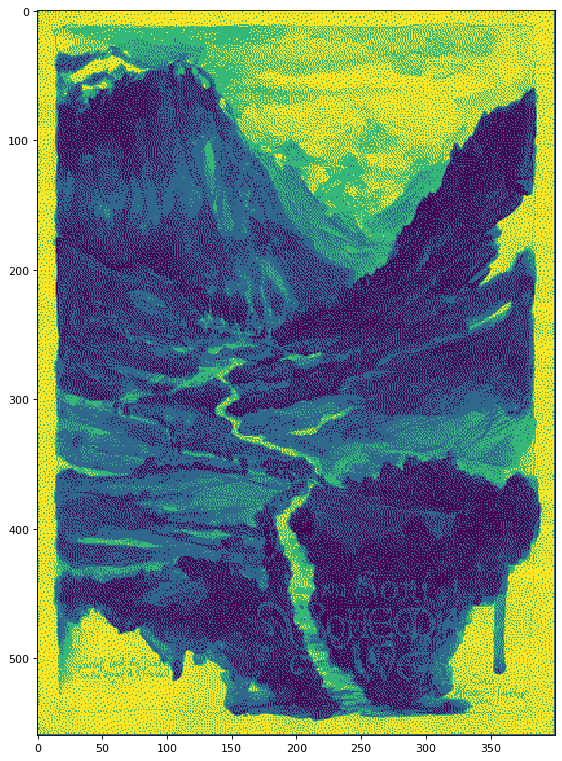

In [45]:

import numpy as np
from PIL import Image
from matplotlib import cm
from matplotlib.pyplot import imshow
from matplotlib.pyplot import figure
from requests import get
%matplotlib inline

def image_dither(path, black='#000000', white='#ffffff'):
    image_rgb = read_image(path)
    #image_gray = grayscale(image_rgb)
    #image_bw = floyd_steinberg(image_gray)
    image_col = floyd_steinberg(keepcols(image_rgb))
    #im = Image.fromarray(np.uint8(cm.gist_earth(image_bw)*255))
    #im.show() # shows in image viewer
    figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
    #after = zhangSuen(image_bw)
    #imshow(image_bw) # show inline
    imshow(image_col) # show inline
    #imshow(after) # show inline
    #show(layout([[
    #    plot(image_gray, palette=gray(256)),
    #    plot(image_bw, palette=[black, white])        
    #]]))
    
def floyd_steinberg(image):
    image = image.copy()
    distribution = np.array([7, 3, 5, 1], dtype=float) / 16
    u = np.array([0, 1, 1, 1])
    v = np.array([1, -1, 0, 1])
    for y in range(image.shape[0] - 1):
        for x in range(image.shape[1] - 1):
            value = np.round(image[y, x])
            error = image[y, x] - value
            image[y, x] = value
            image[y + u, x + v] += error * distribution      
    image[:, -1] = 1
    image[-1, :] = 1
    return image

def grayscale(image):
    height, width, _ = image.shape
    image = np.array(image, dtype=np.float32) / 255
    image = image[:, :, 0] * .21 + \
            image[:, :, 1] * .72 + \
            image[:, :, 2] * .07
    return image.reshape(height, width)

def keepcols(image):
    height, width, _ = image.shape
    image = np.array(image, dtype=np.float32) / 255
    image = image[:, :, 0] + \
            image[:, :, 1] + \
            image[:, :, 2]
    return image.reshape(height, width)

def read_image(path, size=400):
    if path.startswith('https://'):
        image = Image.open(get(path, stream=True).raw)
    else:
        image = Image.open(path)
    
    width, height = image.size
    width, height = size, int(size * height / width)
    image = image.resize((width, height), Image.ANTIALIAS)  
    data = image.getdata()
    assert data.bands in [3, 4], 'RGB or RGBA image is required'
    raw = np.array(data, dtype=np.uint8)
    return raw.reshape(height, width, data.bands)

def plot(image, palette):
    y, x = image.shape
    plot = figure(x_range=(0, x), y_range=(0, y), 
                  plot_width=x, plot_height=y)
    plot.axis.visible = False
    plot.toolbar_location = None
    plot.min_border = 0
    plot.image([np.flipud(image)], x=0, y=0, dw=x, dh=y,
               palette=palette)
    return plot

if __name__=='__main__':
    image_dither('lotr-2012-rivendell-valley-landscape.jpg')

In [1]:
lst = [1703, 730, 300]
[(x / sum(lst)) for x in lst]

[0.6231247713135748, 0.26710574460300035, 0.10976948408342481]

In [1]:
import math

def contsq(a, n):
    res = a
    for i in range(n):
        res = a * math.sqrt(res)
    return res

if __name__=='__main__':
    print(contsq(10, 100))

100.0


In [1]:
# A stack is a container of elements with last in, first out access policy. Sometimes it also called LIFO.

class Stack:
    def __init__(self):
        self._first = None
        
    def __nonzero__(self):
        return self._first is not None 
    
    def append(self, value): # push
        self._first = (value, self._first) # stack is implemented as a nested list
        
    def pop(self):
        if self._first is None:
            raise IndexError("pop from empty stack")
        value, self._first = self._first
        return value
    
    def empty(self):
        if self._first is None:
            return True
        return False
        
if __name__=='__main__':
    mystack = Stack()
    mystack.append(5)
    mystack.append(8)
    mystack.append(2)
    print(mystack._first)
    print(mystack.empty())
    print(mystack.pop())
    print(mystack.pop())

(2, (8, (5, None)))
False
2
8


In [9]:
# Gray code
import math

def refl(l):
    '''reflect list and append'''
    return l + [x for x in l[::-1]]

def gray_enc(n):
    '''encode n in Gray code'''
    clst = ['0', '1']
    ndig = int(math.log2(n)) + 1 # number of digits needed
    k = 1
    np = 2 # to speed up: powers of 2 = length of encoding
    while k < ndig:
        prefl = [0] * np + [1] * np # set new prefixes
        digl = refl(clst) # reflect last digit list
        clst = []
        for i in range(len(digl)):
            clst.append(str(prefl[i]) + str(digl[i])) # concatenate prefixes and digits
        k += 1
        np *= 2
    return clst, ndig, clst[n]

def gray_dec(n):
    '''decode n from Gray code'''
    gclst = gray_enc(2**len(n)-1)[0]
    print(gclst)
    return gclst.index(n)

if __name__=='__main__':
    #print(refl([1,2,3]))
    print(gray_enc(10))
    print(gray_dec('1111'))
    print(gray_enc(17))
    print(gray_dec('11001'))

(['0000', '0001', '0011', '0010', '0110', '0111', '0101', '0100', '1100', '1101', '1111', '1110', '1010', '1011', '1001', '1000'], 4, '1111')
['0000', '0001', '0011', '0010', '0110', '0111', '0101', '0100', '1100', '1101', '1111', '1110', '1010', '1011', '1001', '1000']
10
(['00000', '00001', '00011', '00010', '00110', '00111', '00101', '00100', '01100', '01101', '01111', '01110', '01010', '01011', '01001', '01000', '11000', '11001', '11011', '11010', '11110', '11111', '11101', '11100', '10100', '10101', '10111', '10110', '10010', '10011', '10001', '10000'], 5, '11001')
['00000', '00001', '00011', '00010', '00110', '00111', '00101', '00100', '01100', '01101', '01111', '01110', '01010', '01011', '01001', '01000', '11000', '11001', '11011', '11010', '11110', '11111', '11101', '11100', '10100', '10101', '10111', '10110', '10010', '10011', '10001', '10000']
17
